<a href="https://colab.research.google.com/github/sniggel/colab-repo/blob/master/Week3_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.13.1
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_______________________________________________________________

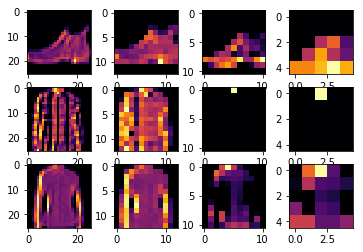

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

## Load MNIST
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

## Give a new shape to the array without changing its data.
## where: 60000 = nbInTrainingSet, 28 = width, 28 = height, 1 is dimension
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0

## Give a new shape to the array without changing its data.
## where: 10000 = nbInTestgSet, 28 = width, 28 = height, 1 is dimension
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  ## Add an initial 3*3 convolution layer
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  ## Add a 2*2 hidden pooling layer, reducing the image size by half
  tf.keras.layers.MaxPooling2D(2, 2),
  ## Add a 3*3 hidden convolution layer, relu returns 0 on negative values
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  ## Add a 2*2 hidden pooling layer, reducing the image size by half
  tf.keras.layers.MaxPooling2D(2,2),
  ## Flattens the images to a 1D array (as we can see in the summary: (None, 1600) )
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Display the size and shape of the network, notice the image is reduced after
## every MaxPooling layer
model.summary()

model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)

## Prints the first 100 labels in the test set
print(test_labels[:100])

f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)
  
  
## Try editing the convolutions. Change the 32s to either 16 or 64.
## What impact will this have on accuracy and/or training time ?

## Answer:
## After tuning the convolution from 64 to 32, we notice that the loss is
## higher and that the accuracy is a bit lower.
## This would indicate that the current prediction's guess is not as good
## as with higher value. In the case of the loss, the summation of the errors
## is greater so the guess is not as good.

## The accuracy did not change that much from 64 to 32 so it would indicate
## that the model was able to predict (close to) as many sample as the previous
## example.

## There was a slight time improvement, however, I didn't measure this value
## properly because I was running many colab sheet at the same time.

## TLDR: Lowering the kernel size of a convolution will decrease the confidence
## that we have on the prediction while not really affecting the effective
## nb. of predictions made.